### Image

In [1]:
import glob
import tiffile as tf
import matplotlib.pyplot as plt 
import imageio.v3 as iio
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import numpy as np

In [2]:
img_dir = './tatz_validation/'

In [12]:
img_files = sorted(glob.glob(f'{img_dir}*_img.tif'))
mask_files = sorted(glob.glob(f'{img_dir}*mask*.tif'))
img_id = [item.split('/')[-1][:4] for item in img_files]
int_id =[int(item) for item in img_id] 

In [18]:
int_id

[5, 24]

#### check image and mask

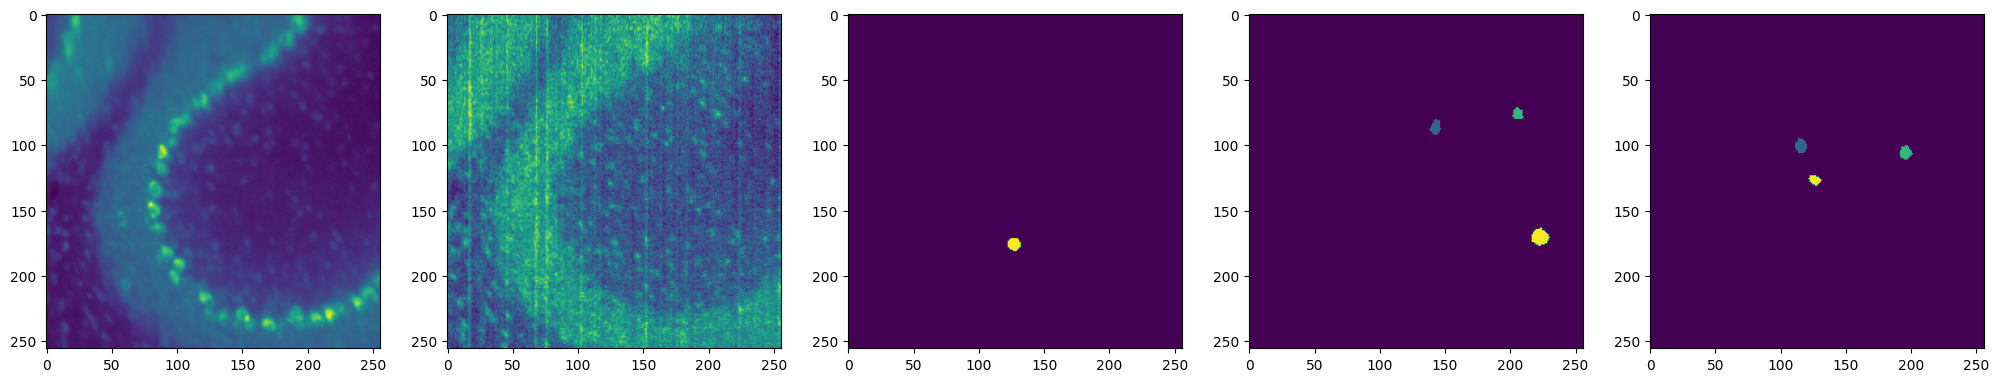

In [14]:
fig, ax = plt.subplots(1,5, figsize = (25,5))
check_id = 1
img = img_files[check_id]
mask = mask_files[3*check_id:3*(check_id+1)]
ax[0].imshow(tf.imread(img)[0])
ax[1].imshow(tf.imread(img)[1])
ax[2].imshow(tf.imread(mask[0]))
ax[3].imshow(tf.imread(mask[1]))
ax[4].imshow(tf.imread(mask[2]))

In [21]:

# Create a PdfPages object to save the figures
with PdfPages('check_val_images.pdf') as pdf:
    for check_id in range(len(int_id)):
        img = img_files[check_id]
        # Normalize the second channel of the image to 0-1
        
        mask = mask_files[3*check_id:3*(check_id+1)]
        # Create a figure with subplots
        fig, ax = plt.subplots(1, 5, figsize=(15, 5))
        
        # Display the images
        ax[0].imshow(iio.imread(img)[0])
        ax[1].imshow(normalized_img)
        ax[2].imshow(iio.imread(mask[0]))
        ax[3].imshow(iio.imread(mask[1]))
        ax[4].imshow(iio.imread(mask[2]))
        
        # Set titles for each subplot
        ax[0].set_title(f'Image {int_id[check_id]} - Channel 0')
        ax[1].set_title(f'Image {int_id[check_id]} - Channel 1')
        ax[2].set_title(f'{int_id[check_id]} Mask 1')
        ax[3].set_title(f'{int_id[check_id]} Mask 2')
        ax[4].set_title(f'{int_id[check_id]} Mask 3')
        
        # Remove axis labels
        for a in ax:
            a.axis('off')
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the current figure into the PDF
        pdf.savefig(fig)
        
        # Close the figure to free memory
        plt.close(fig)

print("PDF saved successfully.")


PDF saved successfully.


### Pickle

In [23]:
with open('./tatz_validation/tatz_validation.pkl', 'rb') as f:
    check_data = pickle.load(f)

In [24]:
check_data

,ID,integer_ID,instance_counts,corner,source,ref_channel,channel,crop_size,isHard,plane_position,select_plane
5,0005,5,3,"[1227, 551, 2984]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,49,True
24,0024,24,3,"[1118, 5850, 4848]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,0,True
165,0165,165,0,"[1008, 7270, 2536]",/mnt/aperto/fused/fused.n5,3,4,"[100, 256, 256]",0,0,True
60,0060,60,2,"[1207, 2997, 4567]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,49,True
231,0231,231,0,"[943, 4331, 4980]",/mnt/aperto/fused/fused.n5,3,4,"[100, 256, 256]",0,0,True
275,0275,275,0,"[1094, 4194, 1046]",/mnt/aperto/fused/fused.n5,3,4,"[100, 256, 256]",0,0,True
282,0282,282,0,"[1164, 5110, 3803]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,0,True
118,0118,118,0,"[1924, 7891, 2088]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,0,True
244,0244,244,0,"[874, 2539, 1301]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,0,True
59,0059,59,0,"[1207, 1266, 4353]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,0,True
